# Aviation Dataset

We have a dataset called `Aviation_Data.csv` that we will analysis/clean in order to present all the relevant facts to the management team. In order to analyse the data appropriately, we will have to follow the folliwing steps:

#### 1. Understand the Dataset

#### 2. Clean the Data

#### 3. Key Metrics for Risk Analysis

## 1. Understand the Dataset

Understanding the data is the first step that needs to be performed. In the cell below, we import the required libraries including:

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The file is located in the following path `data/Aviation_Data.csv`. We shall create a dataframe called aviation_data in order to read the data.

In [75]:
aviation_data = pd.read_csv('data/Aviation_data.csv', low_memory=False)

Using some the following built in pandas functions, we shall find out more info about the dataset that we have: 

- `.info`
- `.head`
- `.index`
- `.columns`
- `.dtypes`
- `.shape`

In [26]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [66]:
aviation_data.info()
aviation_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

(90348, 31)

Based on the information given above, we have 31 columns of mixed datatypes. The first step of our data analysis will be identify which of the columns are relevant to our analysis. Apart from using the names of the columns, we can use the .unique() attribute to get a better understanding of the columns as shown below:

In [43]:
unique_invenstigation_type = aviation_data['Investigation.Type'].unique()
print(unique_invenstigation_type)
#aviation_data.loc[aviation_data['Investigation.Type'] == '25-09-2021']

['Accident' 'Incident' '25-09-2020' '14-06-2021' '03-11-2020' '24-02-2021'
 '02-02-2021' '05-05-2021' '03-12-2020' '07-12-2020' '06-05-2021'
 '19-11-2020' '04-08-2021' '13-09-2021' '10-06-2021' '14-12-2021'
 '08-06-2021' '24-06-2021' '24-08-2021' '31-03-2021' '27-05-2021'
 '20-05-2021' '18-11-2020' '25-05-2021' '01-06-2021' '15-07-2021'
 '15-10-2021' '26-09-2020' '03-06-2021' '29-09-2021' '28-01-2021'
 '20-10-2021' '11-12-2020' '11-02-2021' '13-12-2021' '06-01-2021'
 '31-08-2021' '04-03-2021' '05-04-2021' '26-01-2021' '29-01-2021'
 '26-08-2021' '08-11-2021' '20-08-2021' '05-01-2021' '22-09-2021'
 '20-09-2021' '16-07-2021' '19-10-2021' '16-11-2021' '17-12-2021'
 '14-06-2022' '22-06-2022' '13-10-2022' '03-11-2022' '13-07-2022'
 '05-07-2022' '01-09-2022' '12-08-2022' '08-09-2022' '22-09-2022'
 '01-11-2022' '01-07-2022' '20-07-2022' '06-10-2022' '23-09-2022'
 '02-12-2022' '05-08-2022' '08-12-2022' '15-12-2022' '20-12-2022']


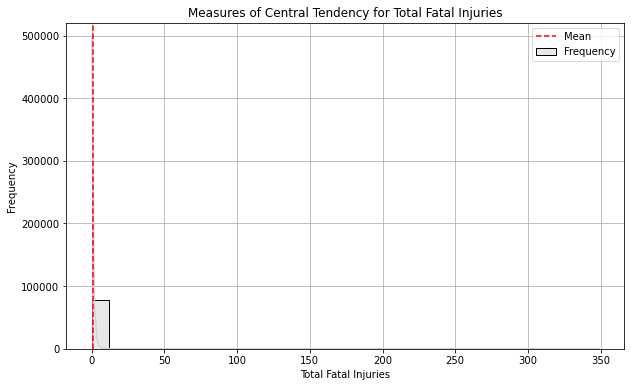

In [87]:
# Calculate measures of central tendency
mean_value = aviation_data['Total.Fatal.Injuries'].mean()
median_value = aviation_data['Total.Fatal.Injuries'].median()
mode_value = aviation_data['Total.Fatal.Injuries'].mode()[0]  # mode() returns a Series

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.histplot(aviation_data['Total.Fatal.Injuries'], bins=30, kde=True, color='lightgray', label='Frequency')
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
#plt.axvline(median_value, color='blue', linestyle='-', label='Median')
#plt.axvline(mode_value, color='green', linestyle=':', label='Mode')

# Customize the plot
plt.title('Measures of Central Tendency for Total Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

## 2. Clean the Data

Now that we understand the attributes of the dataset that we have been given, we now have to clean the data through the following steps: 

<b>2.1. Missing Values</b>

From my analysis, the irrelevant columns are: 

<b>1. Event.Id </b> - Has no relevance to our business problem <br>
<b> 2. Airport.Code </b> -  Has no relevance to our business problem <br>
<b> 5. Airport.Name </b> -  Same reason as the Airport.Code column<br>
<b> 3. Latitude </b> - 62.95% of the rows are missing data from this column. <br>
<b> 4. Longitude </b> - 62.96% of the rows are missing this data from this column. <br>
<b> 6. Publication.Date </b> -  <br>
<b> 7. Registration.Number </b> -  <br>
<b> 8. FAR.Description</b> -  <br>
<b> 9. Schedule</b> -  <br>
<b> 10. Air.carrier</b> -  <br>
<b> 11. Amateur.Built</b> -  <br>

We should drop these columns from the dataset. 

In [45]:
columns_to_drop = ['Event.Id', 'Airport.Code', 'Latitude','Longitude','Airport.Name','Publication.Date','Registration.Number','FAR.Description','Schedule','Air.carrier','Amateur.Built']

adc = aviation_data.drop(columns=columns_to_drop)
adc.head()


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [48]:
adc.info()
adc.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Aircraft.Category       32287 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81812 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

(90348, 20)

Now that we have the relevant columns, we now need to do the same thing with the rows. 

In [80]:
print(adc.isnull().sum())

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
dtype: int64


#### 1. Investigation.Type

In [49]:
unique_invenstigation_type = adc['Investigation.Type'].unique()
print(unique_invenstigation_type)

['Accident' 'Incident' '25-09-2020' '14-06-2021' '03-11-2020' '24-02-2021'
 '02-02-2021' '05-05-2021' '03-12-2020' '07-12-2020' '06-05-2021'
 '19-11-2020' '04-08-2021' '13-09-2021' '10-06-2021' '14-12-2021'
 '08-06-2021' '24-06-2021' '24-08-2021' '31-03-2021' '27-05-2021'
 '20-05-2021' '18-11-2020' '25-05-2021' '01-06-2021' '15-07-2021'
 '15-10-2021' '26-09-2020' '03-06-2021' '29-09-2021' '28-01-2021'
 '20-10-2021' '11-12-2020' '11-02-2021' '13-12-2021' '06-01-2021'
 '31-08-2021' '04-03-2021' '05-04-2021' '26-01-2021' '29-01-2021'
 '26-08-2021' '08-11-2021' '20-08-2021' '05-01-2021' '22-09-2021'
 '20-09-2021' '16-07-2021' '19-10-2021' '16-11-2021' '17-12-2021'
 '14-06-2022' '22-06-2022' '13-10-2022' '03-11-2022' '13-07-2022'
 '05-07-2022' '01-09-2022' '12-08-2022' '08-09-2022' '22-09-2022'
 '01-11-2022' '01-07-2022' '20-07-2022' '06-10-2022' '23-09-2022'
 '02-12-2022' '05-08-2022' '08-12-2022' '15-12-2022' '20-12-2022']


In [56]:
result = adc.loc[(adc['Investigation.Type'] == 'Accident') | (adc['Investigation.Type'] == 'Incident')]
len(result)

88889

In [65]:
problematic_rows = adc.loc[(adc['Investigation.Type'] != 'Accident') & (adc['Investigation.Type'] != 'Incident')]
#problematic_rows = adc[~adc['Investigation.Type'].isin(['Accident', 'Incident'])]
#print(problematic_rows)
problematic_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 64030 to 90097
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      1459 non-null   object 
 1   Accident.Number         0 non-null      object 
 2   Event.Date              0 non-null      object 
 3   Location                0 non-null      object 
 4   Country                 0 non-null      object 
 5   Injury.Severity         0 non-null      object 
 6   Aircraft.damage         0 non-null      object 
 7   Aircraft.Category       0 non-null      object 
 8   Make                    0 non-null      object 
 9   Model                   0 non-null      object 
 10  Number.of.Engines       0 non-null      float64
 11  Engine.Type             0 non-null      object 
 12  Purpose.of.flight       0 non-null      object 
 13  Total.Fatal.Injuries    0 non-null      float64
 14  Total.Serious.Injuries  0 non-null 

The rows where the `Investigation.Type` column is neither <b>Accident</b> or <b>Incident</b> have null entries for all the other columns. As a result these rows are irrelevant and should be dropped.

In [72]:
# Drop rows where "Investigation.Type" is not "Accident" or "Incident".
adc = adc[adc['Investigation.Type'].isin(['Accident', 'Incident'])]

# Optionally, reset the index of the cleaned DataFrame
adc.reset_index(drop=True, inplace=True)
adc

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,210N,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


#### 2. Accident.Number
No need to filter based on this column as we can use this unique identifier later on for ease of reference.
#### 3. Event.Date
We can use this column later on for plotting purposes to look at the trends such as accidents over time.
#### 4. Location
Location
#### 5. Country
Country

#### 6. Injury.Severity
This is a very important column for our analysis. 

In [78]:
unique_injury_severity = adc['Injury.Severity'].unique()
print(unique_injury_severity)

['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fatal(217)' 'Fatal(169)'
 'Fatal(88)' 'Fatal(19)' 'Fatal(60)' 'Fatal(113)' 'Fatal(143)' 'Fatal(83)'
 'Fatal(24)' 'Fatal(44)' 'Fatal(64)' 'Fatal(92

In [77]:
print(adc.isnull().sum())

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
dtype: int64


#### 7. Total.Fatal.Injuries


In [81]:
unique_fatal_injuries = adc['Total.Fatal.Injuries'].unique()
print(unique_fatal_injuries)

[  2.   4.   3.   1.  nan   0.   8.  78.   7.   6.   5. 153.  12.  14.
  23.  10.  11.   9.  17.  13.  29.  70. 135.  31. 256.  25.  82. 156.
  28.  18.  43.  15. 270. 144. 174. 111. 131.  20.  73.  27.  34.  87.
  30.  16.  47.  56.  37. 132.  68.  54.  52.  65.  72. 160. 189. 123.
  33. 110. 230.  97. 349. 125.  35. 228.  75. 104. 229.  80. 217. 169.
  88.  19.  60. 113. 143.  83.  24.  44.  64.  92. 118. 265.  26. 138.
 206.  71.  21.  46. 102. 115. 141.  55. 121.  45. 145. 117. 107. 124.
  49. 154.  96. 114. 199.  89.  57. 152.  90. 103. 158. 157.  42.  77.
 127.  50. 239. 295.  58. 162. 150. 224.  62.  66. 112. 188.  41. 176.]
